In [435]:
import numpy as np
import pandas as pd

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')



In [420]:
raw_data = pd.read_csv('Project_Dataset.csv')
df = raw_data.copy()

In [421]:
df.year = pd.to_datetime(df.year, format = '%Y')
df.index = df.year
del df['year']

In [422]:
df

,GHG_energy,GHG_manufacturing,GHG_Transport,GHG_Others,GHG_fugitive,GHG_Fuel_consumption,Total_GHG_emissions,FC_Energy_Industry(TJ),FC_Transport,FC_Other_Sectors
year,,,,,,,,,,
1990-01-01,0.06,0.61,1.41,1.64,0.02,3.71,3.73,"30,396.67",464.00,3702.35
1991-01-01,0.06,0.50,1.25,1.46,0.02,3.26,3.28,"32,081.27",407.56,3768.16
1992-01-01,0.06,0.61,1.38,1.49,0.02,3.54,3.56,"33,855.80",452.18,3865.47
1993-01-01,0.25,0.56,1.31,1.53,0.02,3.64,3.66,"38,199.94",428.85,3977.29
1994-01-01,0.30,0.65,1.55,1.74,0.02,4.23,4.26,"40,742.25",501.13,4154.90
1995-01-01,0.30,0.63,1.41,1.75,0.02,4.09,4.10,"41,852.88",458.25,4305.82
1996-01-01,0.17,0.45,1.99,2.06,0.02,4.67,4.69,"41,046.98",687.92,4558.44
1997-01-01,0.19,0.30,1.99,2.19,0.00,4.68,4.68,"42,104.23",688.36,4779.83
1998-01-01,1.64,0.49,2.32,2.37,0.02,6.82,6.84,"62,800.24",763.18,4690.19


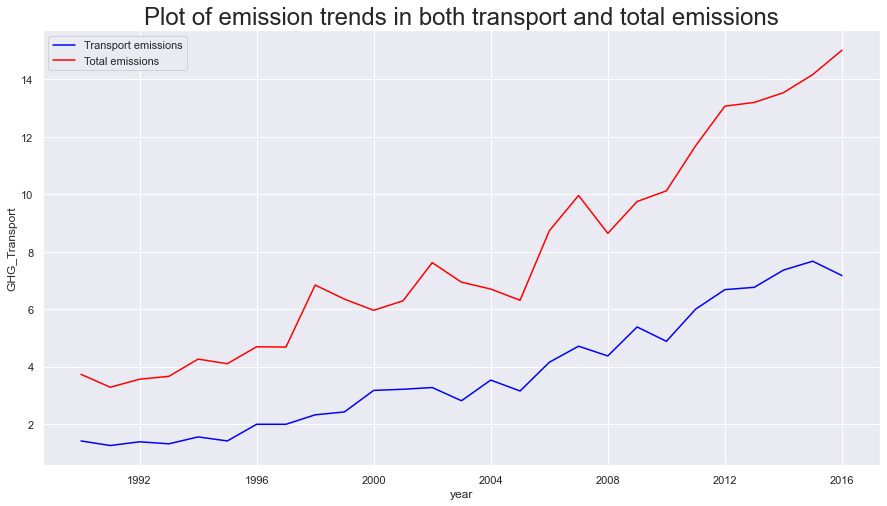

In [425]:
plt.figure(figsize = (15, 8))
sns.lineplot(df.index, df.GHG_Transport, color = 'blue', label = 'Transport emissions')
sns.lineplot(df.index, df.Total_GHG_emissions, color = 'red', label = 'Total emissions' )
plt.title('Plot of emission trends in both transport and total emissions', size = 24)
plt.legend()
plt.show()

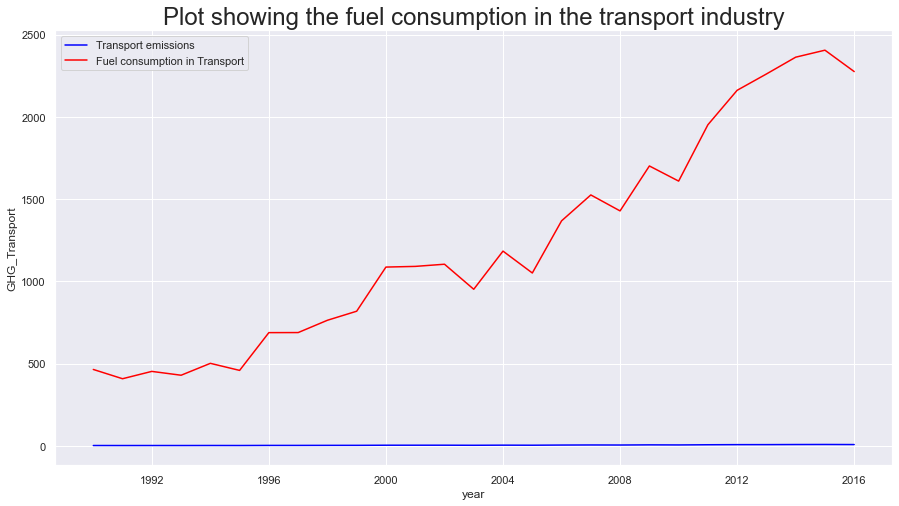

In [426]:
plt.figure(figsize = (15, 8))
sns.lineplot(df.index, df.GHG_Transport, color = 'blue', label = 'Transport emissions')
sns.lineplot(df.index, df.FC_Transport, color = 'red', label = 'Fuel consumption in Transport' )
plt.title('Plot showing the fuel consumption in the transport industry', size = 24)
plt.legend()
plt.show()

It is observed that both the fuel consumption pattern and the GHG emission data follow the same pattern as suggested by the two graphs above.

In [427]:
new_df = df['GHG_Transport']

In [428]:
new_df.head()

year
1990-01-01    1.41
1991-01-01    1.25
1992-01-01    1.38
1993-01-01    1.31
1994-01-01    1.55
Name: GHG_Transport, dtype: float64

In [429]:
#checking for stationarity

sts.adfuller(new_df, autolag = 'AIC')

(0.932919946489634,
 0.9935052472902292,
 1,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 29.001213640478092)

In [430]:
new_df.autocorr(lag = 1)

0.9724983173601988

In [431]:
new_df.autocorr(lag = 4)

0.9443115779475159

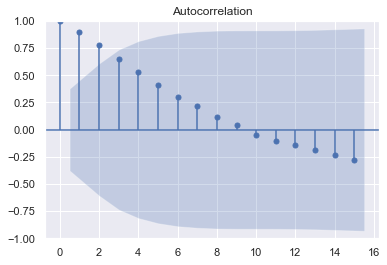

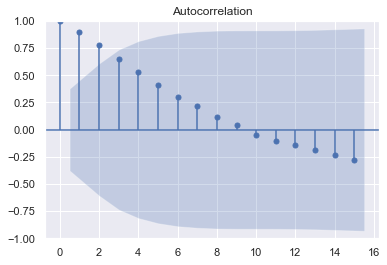

In [432]:
sgt.plot_acf(new_df)

In [433]:
size = int(len(new_df) * 0.8 )
df_train = new_df.iloc[:size]
df_test = new_df.iloc[size:]

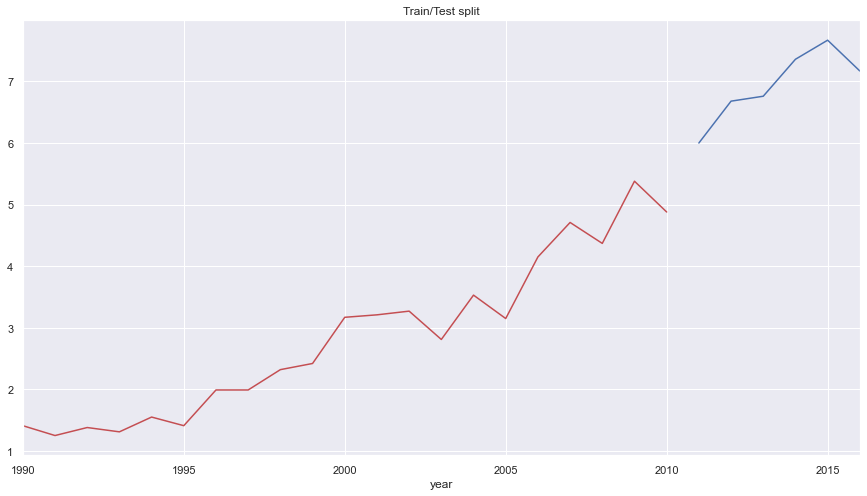

In [436]:
plt.figure(figsize = (15,8))
df_train.plot(color = 'r')
df_test.plot(color = 'b')
plt.title('Train/Test split')
plt.show()

In [437]:
from pmdarima.arima import auto_arima
model = auto_arima(df_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(df_train)
print(model.summary())
forecast = model.predict(n_periods=len(df_test))

forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])

print(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27.525, Time=4.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=29.156, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22.922, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24.471, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=29.885, Time=1.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24.903, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24.909, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26.894, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=29.694, Time=0.28 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 9.960 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  -8.461
Date:                Thu, 05 Jan 2023   AIC                        

<Figure size 1080x576 with 0 Axes>

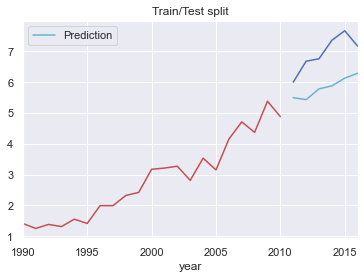

In [440]:
plt.figure(figsize = (15,8))

forecast.plot(color = 'c')
df_train.plot(color = 'r')
df_test.plot(color = 'b')
plt.title('Train/Test split')
plt.show()

In [252]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(df_test,forecast))
print("RMSE: ", rms)

RMSE:  1.1625799217850712


In [254]:
df_test.mean()

6.94

In [443]:
model = auto_arima(new_df, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(new_df)
print(model.summary())
forecast = model.predict(n_periods=len(df_test))

# forecast = pd.DataFrame(forecast,index = df_test.index,columns=['Prediction'])

print(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=35.901, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=39.111, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34.558, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36.110, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42.221, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=36.558, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36.558, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38.509, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=43.506, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.589 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -14.279
Date:                Thu, 05 Jan 2023   AIC                        

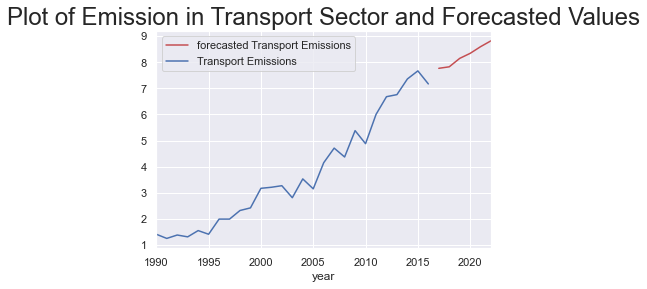

In [447]:
forecast.plot( color = 'r', label = 'forecasted Transport Emissions')
new_df.plot(color = 'b', label = 'Transport Emissions ')
plt.legend()
plt.title('Plot of Emission in Transport Sector and Forecasted Values', size = 24)
plt.show()

In [448]:
raw_data

,year,GHG_energy,GHG_manufacturing,GHG_Transport,GHG_Others,GHG_fugitive,GHG_Fuel_consumption,Total_GHG_emissions,FC_Energy_Industry(TJ),FC_Transport,FC_Other_Sectors
0,1990,0.06,0.61,1.41,1.64,0.02,3.71,3.73,"30,396.67",464.00,3702.35
1,1991,0.06,0.50,1.25,1.46,0.02,3.26,3.28,"32,081.27",407.56,3768.16
2,1992,0.06,0.61,1.38,1.49,0.02,3.54,3.56,"33,855.80",452.18,3865.47
3,1993,0.25,0.56,1.31,1.53,0.02,3.64,3.66,"38,199.94",428.85,3977.29
4,1994,0.30,0.65,1.55,1.74,0.02,4.23,4.26,"40,742.25",501.13,4154.90
5,1995,0.30,0.63,1.41,1.75,0.02,4.09,4.10,"41,852.88",458.25,4305.82
6,1996,0.17,0.45,1.99,2.06,0.02,4.67,4.69,"41,046.98",687.92,4558.44
7,1997,0.19,0.30,1.99,2.19,0.00,4.68,4.68,"42,104.23",688.36,4779.83
8,1998,1.64,0.49,2.32,2.37,0.02,6.82,6.84,"62,800.24",763.18,4690.19
9,1999,1.23,0.47,2.42,2.20,0.03,6.33,6.35,"58,223.97",818.19,4707.76


In [449]:
tot_df = df['Total_GHG_emissions']

In [450]:
tot_df

year
1990-01-01     3.73
1991-01-01     3.28
1992-01-01     3.56
1993-01-01     3.66
1994-01-01     4.26
1995-01-01     4.10
1996-01-01     4.69
1997-01-01     4.68
1998-01-01     6.84
1999-01-01     6.35
2000-01-01     5.96
2001-01-01     6.29
2002-01-01     7.62
2003-01-01     6.94
2004-01-01     6.70
2005-01-01     6.31
2006-01-01     8.73
2007-01-01     9.96
2008-01-01     8.64
2009-01-01     9.75
2010-01-01    10.12
2011-01-01    11.69
2012-01-01    13.07
2013-01-01    13.20
2014-01-01    13.54
2015-01-01    14.17
2016-01-01    15.02
Name: Total_GHG_emissions, dtype: float64

<AxesSubplot:xlabel='year'>

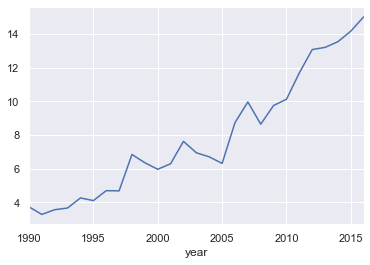

In [451]:
tot_df.plot()

In [452]:
size = int(len(tot_df) * 0.8 )
df_tot_train = tot_df.iloc[:size]
df_tot_test = tot_df.iloc[size:]

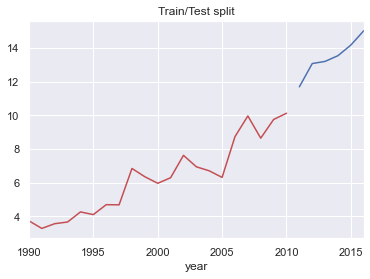

In [453]:
df_tot_train.plot(color = 'r')
df_tot_test.plot(color = 'b')
plt.title('Train/Test split')
plt.show()

In [454]:
from pmdarima.arima import auto_arima
tot_model = auto_arima(df_tot_train, trace=True, error_action='ignore', suppress_warnings=True)
tot_model.fit(df_tot_train)
print(tot_model.summary())
forecast = tot_model.predict(n_periods=len(df_tot_test))

forecast = pd.DataFrame(forecast,index = df_tot_test.index,columns=['Prediction'])

print(forecast)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57.591, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=58.312, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.850, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.622 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -26.796
Date:                Thu, 05 Jan 2023   AIC                             57.591
Time:                        21:34:58   BIC                             59.583
Sample:                    01-01-1990   HQIC                            57.980
                         - 01-0

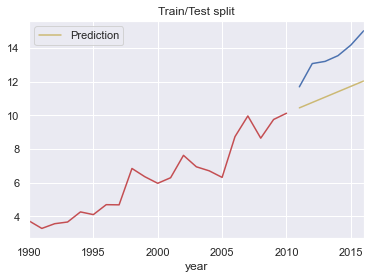

In [455]:
forecast.plot(color = 'y')
df_tot_train.plot(color = 'r')
df_tot_test.plot(color = 'b')
plt.title('Train/Test split')
plt.show()

In [456]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_tot_test, forecast)
mape = mean_absolute_percentage_error(df_tot_test, forecast)
rmse = np.sqrt(mean_squared_error(df_tot_test, forecast))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 2.2100833396121717
mape - auto: 0.16239755470424913
rmse - auto: 2.269597722536585


In [457]:
from statsmodels.tsa.arima.model import ARIMA

In [458]:
model_ari = ARIMA(df_tot_train, order= (6, 1, 0))
model_ari = model_ari.fit()
model_ari.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Total_GHG_emissions   No. Observations:                   21
Model:                  ARIMA(6, 1, 0)   Log Likelihood                 -24.659
Date:                 Thu, 05 Jan 2023   AIC                             63.318
Time:                         21:35:15   BIC                             70.288
Sample:                     01-01-1990   HQIC                            64.679
                          - 01-01-2010                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2937      0.696     -0.422      0.673      -1.658       1.070
ar.L2         -0.0457      0.619     -0.074      0.941      -1.259       1.168
ar.L3          0.0096      0.469      0.021      0.984      -0.909       0.928
ar.L4          0.4944      0.343      1.440      0.150      -0.179       1.167
ar.L5          0.3932      0.693      0.567      0.571      -0.965       1.752
ar.L6          0.0025      1.528      0.002      0.999      -2.993       2.997
sigma2         0.6306      0.288      2.189      0.029       0.066       1.195
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 2.21
Prob(Q):                              0.57   Prob(JB):                         0.33
Heteroskedasticity (H):               8.82   Skew:                             0.80
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [459]:
forecast_1 = model_ari.forecast(len(df_tot_test))

# forecast_tot = pd.DataFrame(forecast,index = df_tot_test.index,columns=['Prediction'])

print(forecast_1)

2011-01-01    11.506628
2012-01-01    10.930115
2013-01-01    11.072470
2014-01-01    11.686488
2015-01-01    12.327858
2016-01-01    12.373908
Freq: AS-JAN, Name: predicted_mean, dtype: float64


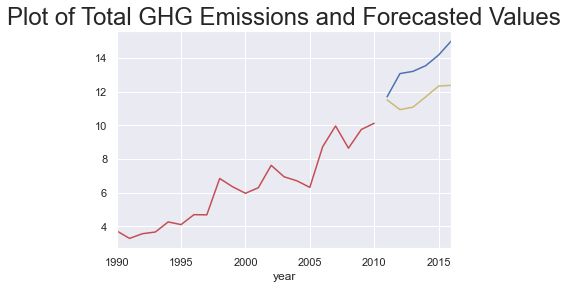

In [462]:
forecast_1.plot(color = 'y', label = 'Forecasted Values on Total GHG Emissions')
df_tot_train.plot(color = 'r', label = 'Train data on Total GHG Emissions')
df_tot_test.plot(color = 'b', label = 'Test data on Total GHG Emissions')
plt.title('Plot of Total GHG Emissions and Forecasted Values', size = 24)
plt.show()

In [463]:

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_tot_test, forecast_1)
mape = mean_absolute_percentage_error(df_tot_test, forecast_1)
rmse = np.sqrt(mean_squared_error(df_tot_test, forecast_1))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 1.7987555247742495
mape - manual: 0.13060891335644384
rmse - manual: 1.9566090110970973


In [464]:
df_tot_test.mean()

13.44833333333333

In [465]:
model_tot = ARIMA(tot_df, order= (6, 1, 0))
model_tot = model_tot.fit()
model_tot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Total_GHG_emissions   No. Observations:                   27
Model:                  ARIMA(6, 1, 0)   Log Likelihood                 -31.069
Date:                 Thu, 05 Jan 2023   AIC                             76.138
Time:                         21:41:56   BIC                             84.944
Sample:                     01-01-1990   HQIC                            78.674
                          - 01-01-2016                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2339      0.250     -0.937      0.349      -0.723       0.255
ar.L2         -0.0930      0.227     -0.410      0.682      -0.538       0.352
ar.L3          0.0544      0.231      0.236      0.813      -0.397       0.506
ar.L4          0.3949      0.268      1.475      0.140      -0.130       0.920
ar.L5          0.4362      0.243      1.792      0.073      -0.041       0.913
ar.L6          0.2042      0.250      0.818      0.414      -0.285       0.694
sigma2         0.5946      0.205      2.905      0.004       0.193       0.996
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 2.31
Prob(Q):                              0.74   Prob(JB):                         0.31
Heteroskedasticity (H):               0.89   Skew:                             0.72
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [466]:
# df_tot_train_diff = df_tot_train.diff().dropna()
# df_tot_train_diff.plot()

In [467]:
# sgt.plot_acf(df_tot_train_diff, lags = 10)
# sgt.plot_pacf(df_tot_train_diff, lags=8, method = 'ols')

In [468]:
start = '2017-01-01'
end = '2022- 01-01'
forecast_t = model_tot.forecast(len(df_test))

# forecast_tot = pd.DataFrame(forecast,index = df_tot_test.index,columns=['Prediction'])

print(forecast_t)


2017-01-01    15.755091
2018-01-01    16.011219
2019-01-01    16.352899
2020-01-01    16.969140
2021-01-01    17.596948
2022-01-01    18.006815
Freq: AS-JAN, Name: predicted_mean, dtype: float64


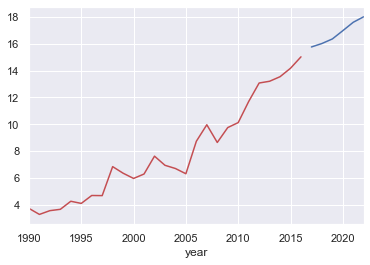

In [379]:
forecast_t.plot(color = 'b')
tot_df.plot(color = 'r')
plt.show()
